## Этап 1. Импортирование библиотек  и данных. Первичное знакомство с данными

###  1.1 Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math as mth
from plotly.subplots import make_subplots
from plotly import graph_objects as go
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
import plotly.io as pio
pio.renderers.default='notebook'

pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 1.2 Чтение файлов и  первичное знакомство с данными

Прочитаем необходимые нам файлы и сохраним их в переменные:

In [2]:
marketing_events = pd.read_csv('ab_project_marketing_events.csv', parse_dates=['start_dt','finish_dt'])
new_users = pd.read_csv('final_ab_new_users.csv', parse_dates=['first_date'])
events = pd.read_csv('final_ab_events.csv', parse_dates=['event_dt'])
participants = pd.read_csv('final_ab_participants.csv')

Познакомимся с каждым датасетом подробнее.

#### 1.2.1 marketing_events

Посмотрим на 10 первых строк датасета:

In [3]:
marketing_events.head(10)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Датасет содержит календарь маркетинговых событий на 2020 год, включает в себя такие столбцы как:
- `name` — название маркетингового события;
- `regions` — регионы, в которых будет проводиться рекламная кампания;
- `start_dt` — дата начала кампании;
- `finish_dt` — дата завершения кампании

Посмотрим на общую информацию о датасете:

In [4]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


Данные содержат 14 строк, 4 столбца, типы данных соответствующие, пропущенных значений нет.Также проверим данные на дубликаты:

In [5]:
marketing_events.duplicated().sum()

0

Дубликаты отстуствуют.

Посмотрим какие встречаются маркетинговые события и нет ли дублей:

In [6]:
marketing_events['name'].value_counts()

Christmas&New Year Promo            1
St. Valentine's Day Giveaway        1
St. Patric's Day Promo              1
Easter Promo                        1
4th of July Promo                   1
Black Friday Ads Campaign           1
Chinese New Year Promo              1
Labor day (May 1st) Ads Campaign    1
International Women's Day Promo     1
Victory Day CIS (May 9th) Event     1
CIS New Year Gift Lottery           1
Dragon Boat Festival Giveaway       1
Single's Day Gift Promo             1
Chinese Moon Festival               1
Name: name, dtype: int64

Каждое событие встречается лишь раз, встречаются такие события как :
* St. Patric's Day Promo - Промо Ко Дню Святого Патрика;
* Labor day (May 1st) Ads Campaign - День Труда - рекламная кампания;
* CIS New Year Gift Lottery - Новогодняя подарочная лотерея СНГ;
* Christmas&New Year Promo - Рождественская и Новогодняя акция;
* Easter Promo - Пасхальное промо;
* Black Friday Ads Campaign - Рекламная кампания Черной Пятницы;
* Dragon Boat Festival Giveaway  - Розыгрыш фестиваля драконьих лодок;
* International Women's Day Promo - Акция к Международному женскому дню;
* 4th of July Promo -  4 июля Акция;
* Chinese Moon Festival - Китайский фестиваль луны;
* Chinese New Year Promo  - Промо-акция на Китайский Новый Год;     
* Single's Day Gift Promo  - Промо Подарок на День холостяка;           
* St. Valentine's Day Giveaway  - Подарок ко Дню Святого Валентина;      
* Victory Day CIS (May 9th) Event   - День Победы СНГ (9 мая) Мероприятие.  

Посмотрим какие встречаются регионы:

In [7]:
marketing_events['regions'].value_counts().to_frame()

,regions
APAC,4
"EU, CIS, APAC, N.America",3
"EU, N.America",2
"EU, CIS, APAC",2
CIS,2
N.America,1


Встречаются Азиатско-Тихоокеанский регион, Европа, СНГ, Северная Америка.

Также посмотрим на даты:

In [8]:
marketing_events['start_dt'].sort_values().unique()

array(['2020-01-25T00:00:00.000000000', '2020-02-14T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-17T00:00:00.000000000',
       '2020-04-12T00:00:00.000000000', '2020-05-01T00:00:00.000000000',
       '2020-05-09T00:00:00.000000000', '2020-06-25T00:00:00.000000000',
       '2020-07-04T00:00:00.000000000', '2020-10-01T00:00:00.000000000',
       '2020-11-11T00:00:00.000000000', '2020-11-26T00:00:00.000000000',
       '2020-12-25T00:00:00.000000000', '2020-12-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [9]:
marketing_events['finish_dt'].sort_values().unique()

array(['2020-02-07T00:00:00.000000000', '2020-02-16T00:00:00.000000000',
       '2020-03-10T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-04-19T00:00:00.000000000', '2020-05-03T00:00:00.000000000',
       '2020-05-11T00:00:00.000000000', '2020-07-01T00:00:00.000000000',
       '2020-07-11T00:00:00.000000000', '2020-10-07T00:00:00.000000000',
       '2020-11-12T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-07T00:00:00.000000000'],
      dtype='datetime64[ns]')

Начальная дата встречается с 25-01-2020 года по 30-12-2020 года. Конечная дата у событий с 07-02-2020 по 07-01-2021. Нужно учитывать данный момент, так как время проведения теста не должно совпадать с маркетинговыми и другими акциями. 

#### 1.2.2 new_users

Посмотрим на 10 случайных строк датасета:

In [10]:
new_users.sample(10)

,user_id,first_date,region,device
23865,B997EF5CC77C929F,2020-12-22,EU,iPhone
48576,C76919822EFDEF0E,2020-12-12,APAC,Android
32046,FD35758CBF218C81,2020-12-23,EU,PC
59227,255AFE513A29FE30,2020-12-20,EU,PC
21249,5A7A4921CAD98930,2020-12-15,EU,Android
24861,7BABA4ECBC9ED4FB,2020-12-22,N.America,PC
7092,F19BBEFC63D5439A,2020-12-14,EU,iPhone
27865,49FD9BBAA3D048C4,2020-12-09,EU,iPhone
12808,80F199E036359901,2020-12-21,N.America,Android
58934,34EB2BBF6632E496,2020-12-20,EU,PC


Датасет содержит данные о пользователях, зарегистрировавшихся в интернет-магазине в период с 7 по 21 декабря 2020 года, включает в себя такие столбцы как:
- `user_id` — идентификатор пользователя;
- `first_date` — дата регистрации;
- `region` — регион пользователя;
- `device` — устройство, с которого происходила регистрация.

Посмотрим на общую информаицю о датасете:

In [11]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


Данные содержат 61733 строк, 4 столбца, типы данных соответствующие, пропущенных значений нет. Также проверим данные на дубликаты:

In [12]:
new_users.duplicated().sum()

0

Дубликаты отстуствуют.

Посмотрим на количество уникальных пользователей:

In [13]:
new_users['user_id'].nunique()

61733

61733 уникальных пользователей. Посмотрим на дату регистрации пользователей и проверим, действительно ли данные за период с 7 по 21 декабря 2020 года:

In [14]:
new_users['first_date'].describe().iloc[4:].to_frame()

,first_date
first,2020-12-07 00:00:00
last,2020-12-23 00:00:00


Данные предоставлены также за 22 и 23 декабря. В Техническом задании указано, что остановка набора новых пользователей 21 декабря 2020 года, нужно учитывать данный факт.

Посмотрим как распределяются данные по региону:

In [15]:
(new_users['region'].value_counts(normalize = True) * 100).to_frame()

,region
EU,74.95
N.America,14.83
CIS,5.11
APAC,5.11


Почти 75% пользователей из Европы, 14,8% из Северной Америки, по 5.11% у СНГ и АТР. Также посмотрим распределения для устройств, с которых происходила регистрация:

In [16]:
(new_users['device'].value_counts(normalize = True) * 100).to_frame()

,device
Android,44.58
PC,25.27
iPhone,20.30
Mac,9.86


44,6% пользователей зарегестрировались с утройств с операционной системой Android. 25.3% с компьютеров, 20,3% с iPhone, 9,9% c Mac. A/B тест должен иметь схожую выборку по условиям, это также важный момент.

#### 1.2.3 events

Посмотрим на 10 последних строк датасета:

In [17]:
events.tail(10)

,user_id,event_dt,event_name,details
440307,1455450835F72F5E,2020-12-30 09:27:10,login,NaN
440308,339C4C55021A83C6,2020-12-30 12:55:08,login,NaN
440309,33E7BCF696B41C7B,2020-12-30 12:21:24,login,NaN
440310,D1553B56FFA8974B,2020-12-30 03:15:35,login,NaN
440311,6181F3835EBE66BF,2020-12-30 12:00:00,login,NaN
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN
440316,7AEC61159B672CC5,2020-12-30 11:36:13,login,NaN


Датасет содержит все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года, включает в себя такие столбцы как:
- `user_id` — идентификатор пользователя;
- `event_dt` — дата и время покупки;
- `event_name` — тип события;
- `details` — дополнительные данные о событии. Например, для покупок, `purchase,` в этом поле хранится стоимость покупки в долларах.

Познакомимся с общей информацией о датасете:

In [18]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


Данные содержат 440317 строк, 4 столбца, типы данных соответствующие, пропущенных значения встречаются в столбце **details**, но это логично, так как в данный столбец заносится лишь дополнительная информация. Также проверим данные на дубликаты:

In [19]:
events.duplicated().sum()

0

Явных дубликатов нет, также проверим дубликаты в таком виде:

In [20]:
events[['user_id','event_dt']].duplicated().sum()

151233

151233 дубликатов с одним пользоваталем и с одним временем, посмотрим на данные строки:

In [21]:
events[events[['user_id','event_dt']].duplicated()].sort_values(['user_id','event_dt'])

,user_id,event_dt,event_name,details
157324,000199F1887AE5E6,2020-12-14 09:56:09,product_page,NaN
299212,000199F1887AE5E6,2020-12-14 09:56:09,login,NaN
81751,000199F1887AE5E6,2020-12-15 07:22:56,product_cart,NaN
163536,000199F1887AE5E6,2020-12-15 07:22:56,product_page,NaN
308595,000199F1887AE5E6,2020-12-15 07:22:56,login,NaN
...,...,...,...,...
327159,FFF91B6C5431F375,2020-12-17 08:27:17,login,NaN
214566,FFFFE36C0F6E92DF,2020-12-22 11:38:57,product_page,NaN
385602,FFFFE36C0F6E92DF,2020-12-22 11:38:57,login,NaN
396849,FFFFE36C0F6E92DF,2020-12-23 05:09:13,login,NaN


Можно заметить, что хоть столбцы пользователей и времени не отличаются, отличается тип события. Посмотрим нет ли дублей, если учеcть и этот момент:

In [22]:
events[['user_id','event_dt','event_name']].duplicated().sum()

0

Таким образом полных дубликатов нет, хотя и отметим момент, что несколько событий у пользователей может встречаться в одно время. 

Посмотрим сколько уникальных пользователей:

In [23]:
events['user_id'].nunique()

58703

58703 уникальных пользователя. Посмотрим на дату по событиям, за какой период данные:

In [24]:
events['event_dt'].describe().to_frame().iloc[4:]

,event_dt
first,2020-12-07 00:00:33
last,2020-12-30 23:36:33


Таким образом можно отметить, что данные заканчиваются 30-12-2020 года, а не 4-01-2021 как было сказано в примечании к датасету. 

Посмотрим как часто встречаются различные типы событий:

In [25]:
(events['event_name'].value_counts(normalize = True) * 100).to_frame()

,event_name
login,43.05
product_page,28.52
purchase,14.25
product_cart,14.19


Получается следующее распределение:
* login (авторизация) - 43% ;
* product_page (страница продукта) - 28,5% ;
* purchase (страница покупки) - 14.3% ;
* product_cart (корзина) - 14,2 %.

purchase и product_cart	имеют особенность, которую уточним у менеджеров, отчего доля у них практически равна, скорее всего это особенность системы.

#### 1.2.4 participants

Посмотрим на 10 случайных строк датасета:

In [26]:
participants.sample(10)

,user_id,group,ab_test
13342,009F1C78D679CDEC,B,interface_eu_test
11084,21729E1837CFACC3,B,interface_eu_test
189,E7DF135C125C7665,A,recommender_system_test
7523,E17C3F1F2A456838,A,interface_eu_test
3563,18C842F57F2FB9EA,B,recommender_system_test
15887,E083A29797014B68,A,interface_eu_test
11201,958A53AA2D471AE9,A,interface_eu_test
15730,9C8ABB3BDC2746A3,B,interface_eu_test
10783,72E4591A9ED9E585,A,interface_eu_test
2336,34BB9070F9BB99E5,B,recommender_system_test


Датасет содержит таблицу участников теста, включает в себя такие столбцы как:
- `user_id` — идентификатор пользователя;
- `ab_test` — название теста;
- `group` — группа пользователя.

Посмотрим общую информацию о датасете:

In [27]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


Данные содержат 18268 строк, 3 столбца, пропущенных значений нет. Также проверим данные на дубликаты:

In [28]:
participants.duplicated().sum()

0

Явных дубликатов нет, посмотрим также в таком виде:

In [29]:
participants['user_id'].duplicated().sum()

1602

1602 пользователя встречаются более 1 раза. Нужно обратить внимание в дальнейшем на данный факт. 

Посмотрим на количество уникальных пользователей:

In [30]:
participants['user_id'].nunique()

16666

16666 уникальных пользователя. Посмотрим как распределяются группы:

In [31]:
(participants['group'].value_counts(normalize = True) * 100).to_frame()

,group
A,52.85
B,47.15


Группа A на данном этапе исследования на более чем на 5% больше группы B. В дальнейшем необходимо проконтролировать данный немаловажный факт. 

Также посмотрим распределение по тестам:

In [32]:
(participants['ab_test'].value_counts(normalize = True) * 100).to_frame()

,ab_test
interface_eu_test,63.32
recommender_system_test,36.68


Лишь 36,7% данных из теста , которые нам подходят. 

### 1.3 Вывод

В нашем распоряжении 4 датасета, при первичном знакомстве было выявлено:

---   
* Датасет **marketing_events** содержит в себе 14 строк,4 столбца:
     * **События**:
        * St. Patric's Day Promo - Промо Ко Дню Святого Патрика;
        * Labor day (May 1st) Ads Campaign - День Труда - рекламная кампания;
        * CIS New Year Gift Lottery - Новогодняя подарочная лотерея СНГ;
        * Christmas&New Year Promo - Рождественская и Новогодняя акция;
        * Easter Promo - Пасхальное промо;
        * Black Friday Ads Campaign - Рекламная кампания Черной Пятницы;
        * Dragon Boat Festival Giveaway - Розыгрыш фестиваля драконьих лодок;
        * International Women's Day Promo - Акция к Международному женскому дню;
        * 4th of July Promo - 4 июля Акция;
        * Chinese Moon Festival - Китайский фестиваль луны;
        * Chinese New Year Promo - Промо-акция на Китайский Новый Год;
        * Single's Day Gift Promo - Промо Подарок на День холостяка;
        * St. Valentine's Day Giveaway - Подарок ко Дню Святого Валентина;
        * Victory Day CIS (May 9th) Event - День Победы СНГ (9 мая) Мероприятие.
     * **Регионы:**
        * Встречаются Азиатско-Тихоокеанский регион;
        * Европа;
        * СНГ;
        * Северная Америка.
     * **Дата начала проведения события:**
        * С 25-01-2020 года по 30-12-2020 года. 
     * **Дата окончания проведения события:**  
        * С 07-02-2020 года по 07-01-2021 года. 
        
     Типы данных соответствующие, пропущенных значений нет,дубликаты отсутствуют.
    

---     
     
* Датасет **new_users** содержит в себе 61733 строк, 4 столбца:
    * **Идентификатор пользователя:**
        * 61733 уникальных пользователей;
    * **Дату регистрации:**
        * с 07-12-2020 года по 23-12-2020 год.
    * **Регион пользователя:**
        * EU;
        * N.America;
        * CIS;
        * APAC.
    * **Устройство, с которого происходила регистрация:**
        * Android;
        * PC;
        * iPhone;
        * Mac.
        
    Типы данных соответствующие, пропущенных значений нет,дубликаты отсутствуют.
     
         
---  

* Датасет **events** содержит в себе 440317 строк, 4 столбца:
   * **Идентификатор пользователя:**
       * 58703 уникальных пользователя.
       
   * **Дата и время покупки:**
       * С 07-12-2020 года по 30-12-2020 год.
   * **Тип события:**
       * login (авторизация) ;
       * product_page (страница продукта);
       * purchase (страница покупки)  ;
       * product_cart (корзина).
   * **Дополнительные данные о событии:**
       * Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.
       
    Типы данных соответствующие, пропущенных значения встречаются в столбце details, но это логично, так как в данный столбец заносится лишь дополнительная информация. Дубликаты встречаются если отобрать пользователя и время, но тип событий отличается у данных строк.

---   

* Датасет **participants** содержит в себе 18268 строк, 3 столбца:
   *  **Идентификатор пользователя:**
       * 16666 уникальных пользователя.
   *  **Название теста:**
      * interface_eu_test;
      * recommender_system_test.
   *  **Группа пользователя:**
      * A;
      * B.
       
    Типы данных соответствующие, пропущенных значений нет, 1602 пользователя встречаются более 1 раза.    
     
---     
           
Нужно учесть, что не все данные попадают под параметры технического здания.




## Этап 2. Предобработка данных

Вспомним **техническое задание**:
* Название теста: recommender_system_test;
* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Аудитория: 15% новых пользователей из региона EU;
* Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
* Ожидаемое количество участников теста: 6000.
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
* Конверсии в просмотр карточек товаров — событие product_page
* Просмотры корзины — product_cart
* Покупки — purchase.


Соответственно необходимо, чтоб данные для теста совпадали с этими параметрами. Приступим. Выберем из таблицы участников теста лишь тех, кто у кого название теста **recommender_system_test**:

In [33]:
NEW_actual_participants  = participants.query('ab_test == "recommender_system_test"')

In [34]:
NEW_actual_participants['group'].value_counts()

A    3824
B    2877
Name: group, dtype: int64

Распределение 3824 у группы A и 2877 у группы B, группа А примерно на 30% больше.

Актуальными пользователями будут являться те, кто зарегестрировался с 07-12-2020 года по 21-12-2020 года. Ранее было выявлено, что в датасете имеются данные с 07-12-2020 по 23-12-2020 года. Помимо этого, нам нужны пользователи из Европейского региона:

In [35]:
NEW_actual_new_users = new_users.query('first_date <= "2020-12-21" ')
NEW_actual_new_users.sample(3)

,user_id,first_date,region,device
3650,346D42ED8517221B,2020-12-07,EU,PC
9875,C29261B1C3279510,2020-12-14,EU,iPhone
50927,081BB2C2F64FC242,2020-12-19,EU,PC


Объединим актуальную таблицу с тестами с актульными пользователями:

In [36]:
NEW_merged = pd.merge(NEW_actual_participants, NEW_actual_new_users, on = 'user_id', how = 'inner')

In [37]:
NEW_merged['group'].value_counts()

A    3824
B    2877
Name: group, dtype: int64

Объединим события пользователей с объединенной таблицей, которая объединяла актуальную таблицу тестов и актуальных пользователей и посмотрим на полученный датасет:

In [38]:
NEW_merged_and_events = pd.merge(events,NEW_merged, on = 'user_id', how = 'right')
NEW_merged_and_events.sample(3)

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
13645,1198061F6AF34B7B,2020-12-11 14:07:11,purchase,4.99,B,recommender_system_test,2020-12-07,EU,iPhone
19922,1544489D5476AD59,2020-12-14 15:27:39,login,NaN,A,recommender_system_test,2020-12-13,EU,Android
19391,56EE3A6402B3BAC0,2020-12-16 20:58:41,product_page,NaN,A,recommender_system_test,2020-12-16,EU,PC


Посмотрим еще раз, какие маркетинговые события в таблице:

In [39]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Таким образом Christmas&New Year Promo и CIS New Year Gift Lottery	пересекаются с нашим тестом. Трогать их не будем.

In [40]:
NEW_merged_and_events.groupby('region')['user_id'].nunique()

region
APAC           72
CIS            55
EU           6351
N.America     223
Name: user_id, dtype: int64

In [41]:
NEW_merged_and_events

,user_id,event_dt,event_name,details,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,2020-12-07 14:43:27,purchase,99.99,A,recommender_system_test,2020-12-07,EU,PC
1,D1ABA3E2887B6A73,2020-12-25 00:04:56,purchase,4.99,A,recommender_system_test,2020-12-07,EU,PC
2,D1ABA3E2887B6A73,2020-12-07 14:43:29,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,PC
3,D1ABA3E2887B6A73,2020-12-25 00:04:57,product_cart,NaN,A,recommender_system_test,2020-12-07,EU,PC
4,D1ABA3E2887B6A73,2020-12-07 14:43:27,product_page,NaN,A,recommender_system_test,2020-12-07,EU,PC
...,...,...,...,...,...,...,...,...,...
27719,6715343AFBA285AE,2020-12-07 10:12:15,login,NaN,B,recommender_system_test,2020-12-07,CIS,Android
27720,6715343AFBA285AE,2020-12-08 22:51:16,login,NaN,B,recommender_system_test,2020-12-07,CIS,Android
27721,6715343AFBA285AE,2020-12-09 02:28:03,login,NaN,B,recommender_system_test,2020-12-07,CIS,Android
27722,6715343AFBA285AE,2020-12-10 22:55:14,login,NaN,B,recommender_system_test,2020-12-07,CIS,Android


Посмотрим на количество новых пользователей из EU:

In [42]:
NEW_merged_and_events.groupby('region')['user_id'].nunique() / new_users.groupby('region')['user_id'].nunique() * 100

region
APAC         2.28
CIS          1.74
EU          13.73
N.America    2.44
Name: user_id, dtype: float64

Убедимся, что даты событий не выходят за рамки технического задания:

In [43]:
NEW_merged_and_events['event_dt'].describe()[4:]

first    2020-12-07 00:05:57
last     2020-12-30 12:42:57
Name: event_dt, dtype: object

Таким образом, подводя итоги можно сказать:
* Название теста recommender_system_test - присутствует;
* В группе A - 3824 уникальных пользователя, в группе B - 2877, что примерно на 30% больше, для качественного A/B теста желательно, чтоб пропорции были соблюдены;
* По регионам распределение следующее: EU - 6351 уникальных пользователей, N.America - 223 уникальных пользователя, APAC-72, CIS - 55
* Новых пользователей из EU - 13.73, при требуемых 15;
* Дата набора пользователей до 23-12-12, но все же в тест они не попали;
* Дата остановки теста указана 04-01-2021 годом, но данные лишь до 30-12-2020 обедененного времени;
* Дата начала теста соответствует.

В Исследовательском анализе проверим еще данный пункт: 
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
    * конверсии в просмотр карточек товаров — событие product_page
    * просмотры корзины — product_cart
    * покупки — purchase.

## Этап 3. Исследовательский анализ данных

### 3.1 Исследование конверсии в воронке на разных этапах

Для исследования воронки конверсии, создадим функцию для создания информацонной таблицы:

In [44]:
def create_info_table(group):
    """Данная функция выводит таблицу конверсии
    
    На вход передается группа теста, на выходе - получаем воронку конверсий по ней 
    """
    result = (NEW_merged_and_events
                  .query('group == @group')
                  .groupby('event_name',as_index = False)
                  .agg({'user_id':'nunique'})
                  .sort_values(by='user_id', ascending=False)
                  .reset_index(drop=True).rename(columns ={'user_id': 'count'})
             )
    result['ratio'] = result['count'] / NEW_merged_and_events['user_id'].nunique()
    numb = 0 
    for i in range(4):
        if i == 0:
            result.loc[i,'conv'] = result.loc[i,'count'] / result.iloc[i,1]
        else: result.loc[i,'conv'] = result.loc[i,'count'] / result.iloc[i-1,1]
    return result


Создадим информацию таблицу для группы A и посмотрим на нее:

In [45]:
table_a = create_info_table('A')
table_a

,event_name,count,ratio,conv
0,login,2747,0.41,1.00
1,product_page,1780,0.27,0.65
2,purchase,872,0.13,0.49
3,product_cart,824,0.12,0.94


Создадим информацию таблицу для группы B и посмотрим на нее:

In [46]:
table_b = create_info_table('B')
table_b

,event_name,count,ratio,conv
0,login,928,0.14,1.00
1,product_page,523,0.08,0.56
2,purchase,256,0.04,0.49
3,product_cart,255,0.04,1.00


Объединим таблицы в одну и посмотрим на итоговый результат:

In [47]:
info_table = pd.merge(table_a,table_b, on = 'event_name',suffixes=('_a', '_b'))
info_table = info_table.reindex([0,1,3,2]).reset_index(drop=True)
info_table

,event_name,count_a,ratio_a,conv_a,count_b,ratio_b,conv_b
0,login,2747,0.41,1.00,928,0.14,1.00
1,product_page,1780,0.27,0.65,523,0.08,0.56
2,product_cart,824,0.12,0.94,255,0.04,1.00
3,purchase,872,0.13,0.49,256,0.04,0.49


Посмотрим визуально на воронке конверсий:

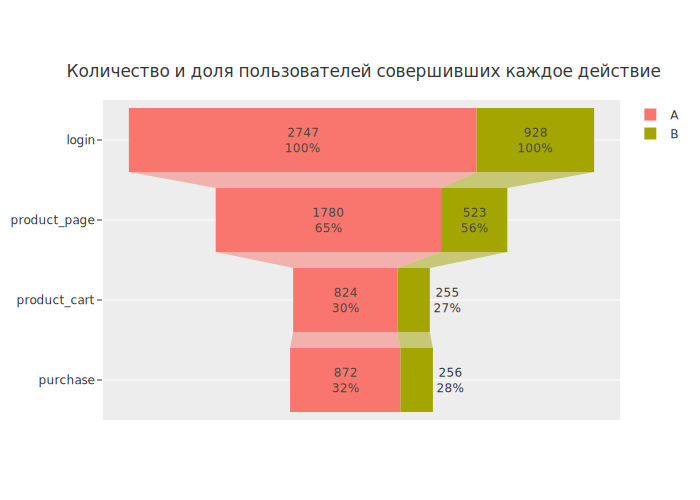

In [48]:
fig = go.Figure(go.Funnel(
    name='A',
    y = info_table['event_name'],
    x = info_table['count_a'],
    textinfo = 'value+percent initial'))

fig.add_trace(go.Funnel(
    name='B',
    y = info_table['event_name'],
    x = info_table['count_b'],
    textinfo = 'value+percent initial'))


fig.update_layout(title={'text': "Количество и доля пользователей совершивших каждое действие", 'xanchor': 'center', 'y':0.87,
        'x':0.52})
fig.layout.template = 'ggplot2'
fig.show("svg")

Событие product_cart очень близко по значению с purchase, надо уточнить у менеджеров особенность системы. Также можно заметить, что конверсия в покупку составляет 32% для группы A и 28% для группы B. Событий группы B меньше гораздо, при 30% меньшем количесвтве в сравнении с групой A.

### 3.2 Обладают ли выборки одинаковыми распределениями количества событий на пользователя?

Посмотрим еще раз на информационное табло:

In [49]:
info_table

,event_name,count_a,ratio_a,conv_a,count_b,ratio_b,conv_b
0,login,2747,0.41,1.00,928,0.14,1.00
1,product_page,1780,0.27,0.65,523,0.08,0.56
2,product_cart,824,0.12,0.94,255,0.04,1.00
3,purchase,872,0.13,0.49,256,0.04,0.49


В группе A тех, кто успел авторизироваться 2747, в то время как в группе B - 928. Страницу с продуктов посетили в группе A 1780, в группе B -523. Корзину посетили 824 пользователя в группе A, 255 раз в группе B. Покупку совершили 872 пользователя, против 256 в группе B. Конверсии не сказать, что сильно отличаются, но в абсолютных значениях разница большая, из-за того, что группа B не успела предпринять действия. 

### 3.3 Как число событий распределено по дням?

Создадим новый столбец с днем:

In [50]:
NEW_merged_and_events['event_day'] = NEW_merged_and_events['event_dt'].astype('datetime64[D]')

Создадим информационный датасет с днями и количеством событий :

In [51]:
NEW_event_day = NEW_merged_and_events.groupby(['event_day','group']).agg(event_counts = ('event_name', 'count')).reset_index()
NEW_event_day

,event_day,group,event_counts
0,2020-12-07,A,331
1,2020-12-07,B,378
2,2020-12-08,A,341
3,2020-12-08,B,252
4,2020-12-09,A,385
5,2020-12-09,B,361
6,2020-12-10,A,350
7,2020-12-10,B,263
8,2020-12-11,A,374
9,2020-12-11,B,168


Посмотрим на распределение визуально:

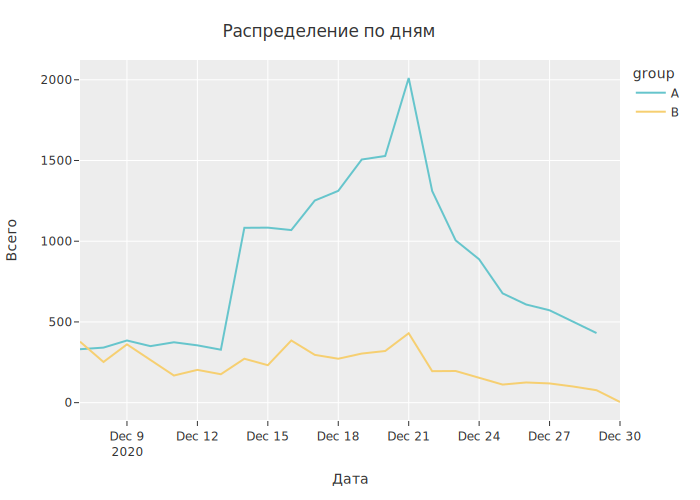

In [62]:
fig = px.line(NEW_event_day, x='event_day',  y ='event_counts', color = 'group', color_discrete_sequence= px.colors.qualitative.Pastel)
fig.update_layout(title={'text': 'Распределение по дням', 'xanchor': 'center', 'y':0.95,
        'x':0.47}, xaxis_title='Дата', yaxis_title='Всего'
                   )
fig.layout.template = 'ggplot2'
fig.show("svg")

Ожидаемо группа A практически везде показывает лучшие результаты , чем группа B. Лишь 07-12-2020 группа B показывает результат лучше. По группе А виден резкий рост 14 числа, возможно, в данный день произошел сбой, который и влияет на результаты анализа..

### 3.4 Есть ли в данных ещё какие-то особенности, которые нужно учесть, прежде чем приступать к A/B-тестированию?

Вспомним еще раз техническое задание:
* Название теста: recommender_system_test;
* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Аудитория: 15% новых пользователей из региона EU;
* Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
* Ожидаемое количество участников теста: 6000.
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 10%:
* Конверсии в просмотр карточек товаров — событие product_page
* Просмотры корзины — product_cart
* Покупки — purchase.

Название теста было выбрано на этапе предобработки данных. Дату запуска учли, дату остановки учли, дату остановки теста учли. Проверим состоит ли аудитория из 15% новых пользоваталей из Региона EU:

In [53]:
NEW_merged_and_events.groupby('region')['user_id'].nunique()

region
APAC           72
CIS            55
EU           6351
N.America     223
Name: user_id, dtype: int64

In [54]:
NEW_merged_and_events.groupby('region')['user_id'].nunique() / new_users['region'].value_counts() * 100 

APAC         2.28
CIS          1.74
EU          13.73
N.America    2.44
dtype: float64

В итоге выходит, что 13.73%  пользователей из Евпроейского региона собраны, из 15 % ожидаемых. 

Проверим насколько получаемая разница статистически значима.

In [55]:
value = .15
count = np.array([6351])
nobs = np.array([46270])
stat, pval = proportions_ztest(count, nobs, value=value)
print(pval)


[1.66777176e-15]


Таким образом статистической разницы между выборками нет.

Также посмотрим количество уникальных пользователей в группах:

In [56]:
NEW_merged_and_events.groupby('group')['user_id'].nunique().sum()

6701

Таким образом план 6000 выполнен. 

### 3.5 Вывод

Проделав исследовательский анализ, еще больше убедились что данные собраны некачественно. Есть множество спорных моментов из-за которыех лучше остановить тест и пересобрать данные заново:
* Нет планируемой аудитории новых пользователей из Европейского региона;
* Лишь 3233 человека из 6000 ожидаемых;
* Прежде были найдены пользователи, участвующие в обеих группах, от которых позже избавились;
* Группа A в 3 раза больше группы B;
* Нет двух контрольных групп, для A/A теста, который желательно бы провести.

## Этап 4. Оценка результатов A/B тестирования

### 4.1 Результаты A/B тестирования

Вспомним информационную таблицу, которую создали при создании воронки:

In [57]:
info_table

,event_name,count_a,ratio_a,conv_a,count_b,ratio_b,conv_b
0,login,2747,0.41,1.00,928,0.14,1.00
1,product_page,1780,0.27,0.65,523,0.08,0.56
2,product_cart,824,0.12,0.94,255,0.04,1.00
3,purchase,872,0.13,0.49,256,0.04,0.49


Посмотрим насколько конверсия в группе B отличается от конверсии группы A:

In [58]:
info_table['delta'] = table_b['conv'] /  table_a['conv'] * 100 - 100
info_table

,event_name,count_a,ratio_a,conv_a,count_b,ratio_b,conv_b,delta
0,login,2747,0.41,1.00,928,0.14,1.00,0.00
1,product_page,1780,0.27,0.65,523,0.08,0.56,-13.03
2,product_cart,824,0.12,0.94,255,0.04,1.00,-0.08
3,purchase,872,0.13,0.49,256,0.04,0.49,5.41


Таким образом по продуктовой страницу разница в конверсиях - 13%, в корзине - 0.08%, в покупках + 5.4%. Условиях тех задания не достигнуто. Улучшений метрик минимум на 10% нет. 

### 4.2 Проверка статистической разницы долей z-критерием.

Для проведения теста будем использовать - гипотезы о равенстве долей. Нулевая гипотеза - доли не имеют статистических различий, альтернативная - имеют. Альфу возьмём за 5%. Для начала создадим функцию для Z-теста:

In [59]:
def z_test(successes, trials, alpha):  

    # alpha = .05 # критический уровень статистической значимости

    # successes = np.array([838, 1989])
    # trials = np.array([12262, 44065])

    alpha = alpha
    successes = successes
    trials = trials

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

# z_test(successes, trials, alpha) 

Вспомним информационное табло:

In [60]:
info_table

,event_name,count_a,ratio_a,conv_a,count_b,ratio_b,conv_b,delta
0,login,2747,0.41,1.00,928,0.14,1.00,0.00
1,product_page,1780,0.27,0.65,523,0.08,0.56,-13.03
2,product_cart,824,0.12,0.94,255,0.04,1.00,-0.08
3,purchase,872,0.13,0.49,256,0.04,0.49,5.41


Сопоставим данные из таблицы:

In [61]:
alpha = .05
trials = [info_table.iloc[0,1], info_table.iloc[0,4]]

s = { 'product_page':[info_table.iloc[1,1],info_table.iloc[1,4]], 'product_cart':[info_table.iloc[2,1],info_table.iloc[2,4]], 'purchase':[info_table.iloc[3,1],info_table.iloc[3,4]]}

for ev in [ 'product_page','product_cart', 'purchase']:
    successes = s[ev]
    print(f'Тестируем событие "{ev}" / successes = {s[ev]}')
    z_test(successes, trials, alpha)
    print()

Тестируем событие "product_page" / successes = [1780, 523]
p-значение:  4.310980554755872e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница

Тестируем событие "product_cart" / successes = [824, 255]
p-значение:  0.14534814557238196
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Тестируем событие "purchase" / successes = [872, 256]
p-значение:  0.017592402663314743
Отвергаем нулевую гипотезу: между долями есть значимая разница



**Вывод:** На странице продукта отвергаем нулевую гипотезу. Между долями есть значимая разница. По покупке, также, овтергаем нулевую гипотезу, между долями есть значимая разница. Вот, что касаемо корзины, отвергнуть нулевую гипотезу не удалось, нет оснований считать доли разными.

## Этап 5. Общий вывод

В нашем распоряжении 4 датасета, при знакомстве с которыми было выявлено:

* Датасет **marketing_events**  содержит календарь маркетинговых событий на 2020 год,включает в себя 14 строк,4 столбца:
    * Типы данных соответствующие, пропущенных значений нет,дубликаты отсутствуют.
    

---     
     
* Датасет **new_users** содержит данные о пользователях, зарегистрировавшихся в интернет-магазине в период с 7 по 23 декабря 2020 года,включает в себя 61733 строк, 4 столбца:
    * Типы данных соответствующие, пропущенных значений нет,дубликаты отсутствуют.
     
         
---  

* Датасет **events** содержит все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года,включает в себя 440317 строк, 4 столбца:
    * Типы данных соответствующие, пропущенных значения встречаются в столбце details, но это логично, так как в данный столбец заносится лишь дополнительная информация. Дубликаты встречаются если отобрать пользователя и время, но тип событий отличается у данных строк.

---   

* Датасет **participants** содержит таблицу участников теста, включает в себя 18268 строк, 3 столбца:
    * Типы данных соответствующие, пропущенных значений нет, 1602 пользователя встречаются более 1 раза.   
---
При предобработке данных, были подогнаны данные под техническое задание:
* Выбрано название теста recommender_system_test;
* Включены лишь те, кто успел зарегистрироваться до 21-12-2020 года;
* Исключены те, кто пересекался с маркетинговыми событтями
---
На этапе исследовательского анализа данных:
* Группа A процентов на 30% объемнее группы B;
* Соотношение событий в группах 3 к 1 в пользу группы A;
* Событие product_cart очень близко по значению с purchase, надо уточнить у менеджеров особенность системы;
* Конверсия в покупку составляет 32% для группы A и 28% для группы B.;
* В динамике времени, группа A практически везде показывает лучшие результаты , чем группа B. Лишь 07-12-2020 и 26-12-2020 группа B показывает результат лучше. 
* Доля новых пользователей Европейского региона составляет лишь 13.73%, при ожидаемых 15%;
* С количеством все в порядке.
---
При оценке результатов A/B тестирования было выявлено:
* Нулевая гипотеза отвергнута. Статистическая разница в конверсиях групп A и B имеет место быть. Кроме события посещения корзины.
---
**Рекомендации:**
Переделать тест правильно, учитывать маркетинговые события, учитывать группы участников, чтоб не было пересечений, собирать качественно данные по событиями, выборки следует делать схожими по размерам и характеристикам. Достигать количества заданной выборки. В таблице теста содержались пользователи, по которым нет событий, просьба учесть во внимание данный факт. Не проводить тест в дни, которые могут повлиять на данные, например перед Новым Годом. Также особое внимание уделить факту, что после 14 числа взлет событий в группе A.